# Assignment 1 - Social Graphs and Interactions


## Imports

In [1]:
import random 
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import Image

# Part 1: Binning degree distributions


## Binning real numbers

* **Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.**


In [2]:
gaus_data = []
for n in range(5000):
    gaus_data.append(random.gauss(2, 0.125))

* **Now, let's use `numpy.histogram` to bin those numbers into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?**


```
np.histogram
``` returns histogram values and an array of bin edges of length (hist+1).

The first array (hist) has 10 elements. 
The second array (bins) has 11!


* **Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.**

The bins-list gives us the possibility to make a list which represents the boundaries of the histogram-bins. For every value in the hist-list, there must be a left-boundary and right-boundary. Each of the hist-values is replicated once, and saved as "hist1". The corresponding left/right boundary for the values are saved in "bins1".

Hist1 = [Value-x1, Value-x1,Value-x2, Value-x2,...]

Bin1 = [left-boundary-x1,right-boundary-x1, left-boundary-x2,right-boundary-x2,...]

where right-boundary-x1 is equal to left-boundary-x2.

In [3]:
hist, bins = np.histogram(gaus_data, 10)
hist1 = [val for val in hist for _ in (0,1)] # Replicate the values: Hist-value-1,Hist-value-1, hist-value-2,hist-value-2
bins1 = []
for i in range(10):
    bins1.extend([bins[i], bins[i+1]])  #Selecting the boundaries

Plotting the histogram

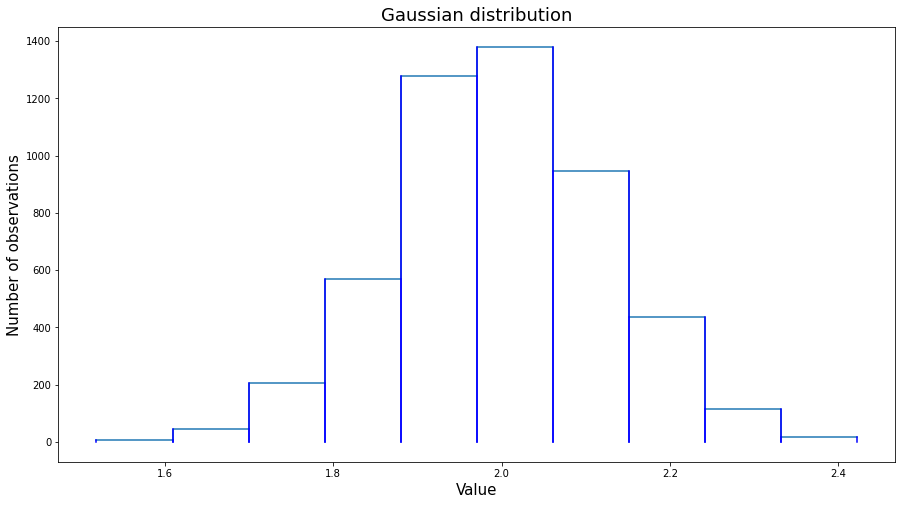

In [4]:
plt.figure(figsize=(15,8))
points=zip(bins1,hist1)
plt.plot(bins1,hist1)

for pt in points: #Creates the vertical lines
    plt.plot( [pt[0],pt[0]], [0,pt[1]],color="blue" )


plt.title("Gaussian distribution", fontsize=18)
plt.ylabel("Number of observations", fontsize=15)
plt.xlabel("Value", fontsize=15)
plt.show()

## Binning integers

* **But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers.**


In [5]:
N = 5000
pois_data = np.random.poisson(10, N)
maxi = pois_data.max()
mini = pois_data.min()

print("The minimum value of the {} random numbers is {}".format(N,mini))
print("The maximum value of the {} random numbers is {}".format(N,maxi))

The minimum value of the 5000 random numbers is 1
The maximum value of the 5000 random numbers is 22



* **Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.**



Creating the binning from vector V.

In [6]:
pois_data.sort()
unique_ = set(pois_data) # Getting unique values
V = [x for x in unique_] # Making a vector of sorted unique values 
V.insert(len(V), maxi+1) # Inserting an extra elemement at the end of the vector
hist, bins = np.histogram(pois_data, V, density=False)
names = [str(x) for x in unique_]
sum_bins = sum(hist)

In [7]:
print("The sum over the bin counts is {}".format(sum_bins))

The sum over the bin counts is 5000


In [8]:
print("The first element in the binning vector is {}".format(bins[0]))
print("The last element in the binning vector is {}".format(bins[-1]))

The first element in the binning vector is 1
The last element in the binning vector is 23


Numpy.histogram bins are all closed except the last bin which includes the full [x,y] range. 

By adding one to the end, so it has its separate bin, it allows one to set the first bin to the smallest value, but the last bin value should be max-value + 1. 

First bin element = Min value of the histogram

Last bin element = Max value of histogram + 1

This is the way the values relate to each other, as it is necessary to create a bin for the max value from the Poisson.

* **Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution** 

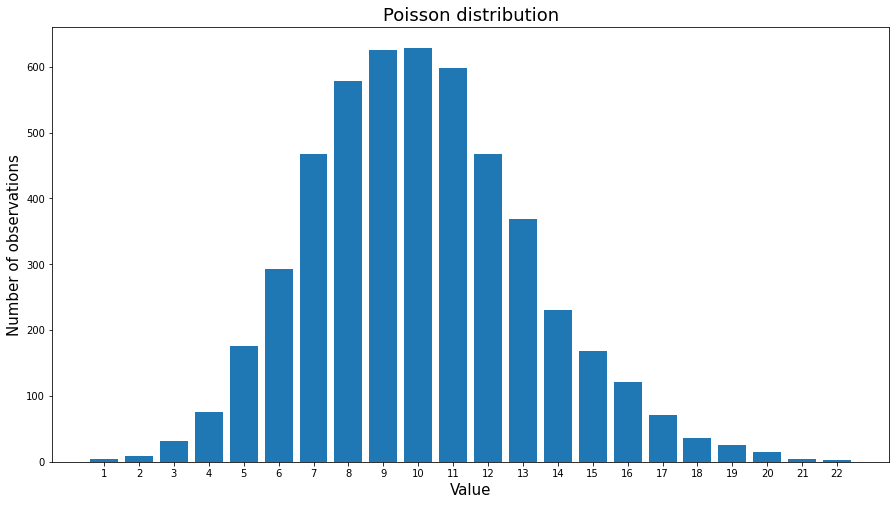

In [9]:
plt.figure(figsize=(15,8))
plt.bar(names, hist)
plt.title("Poisson distribution",fontsize=18)
plt.xlabel("Value",fontsize=15)
plt.ylabel("Number of observations",fontsize=15)
plt.show()

## Binning and plotting degree distributions.

* **Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. First we have to figure out which values the ER parameters (N and p) should assume. It's easy to see that  𝑁=5000 , but how do you find  𝑝 ?**

We know that ⟨*k*⟩ (the same as lambda ) is 10. 
And ⟨*k*⟩=*p(N−1)* 

so *p=k/(N-1)*

In [10]:
k = 10
p = k/(N-1)
print("The value of p is {:.4f}".format(p))

The value of p is 0.0020


* **Now, use `networkx` to create the graph and extract the degree distribution.**

Generating the network.

In [11]:
G = nx.generators.fast_gnp_random_graph(N,p)

* **Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.**

Saving degrees for each node in the graph.

In [12]:
list2=list(dict(G.degree()).values()) 

Plotting degree distribution.

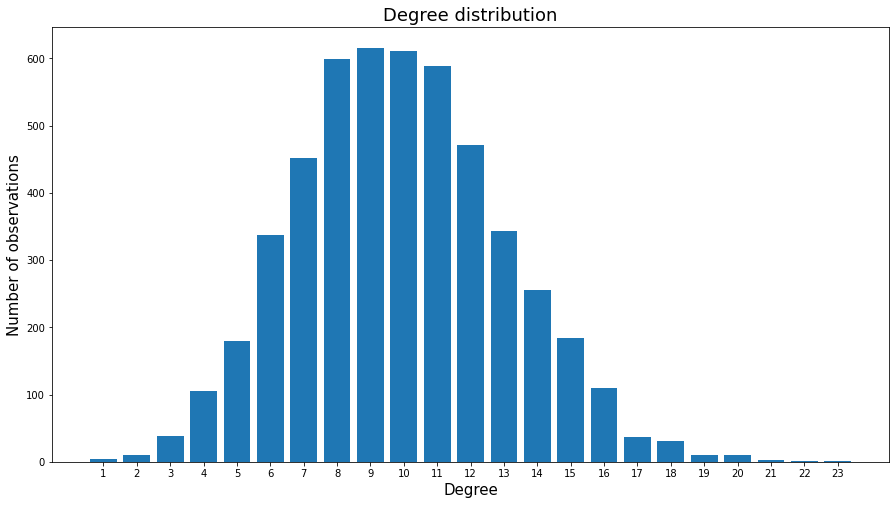

In [13]:
list2.sort()
unique_ = set(list2)
V = [x for x in unique_]
V.insert(len(V), maxi+1)
hist, bins = np.histogram(list2, V, density=False)
names = [str(x) for x in unique_]
sum_bins = sum(hist)
plt.figure(figsize=(15,8))
plt.bar(names, hist)
plt.title("Degree distribution",fontsize=18)
plt.xlabel("Degree",fontsize=15)
plt.ylabel("Number of observations",fontsize=15)
plt.show()

The plot looks like the Poission distribution plot.

# Part 2: Random networks and plotting in networkx


### Erdős-Rényi Networks - Exercise from Section 3.11: Homework in NetworkScience

Consider an Erdős-Rényi network with *N* = 3,000 nodes, connected to each other with probability *p* = 1/1000.


**What is the expected number of links, 〈L〉?**

In [14]:
N=3000
p=1/1000

In [15]:
ExpectedL=p*(N*(N-1)/2)
print("The expected number of links is {}".format(ExpectedL))

The expected number of links is 4498.5


**In which regime is the network?**

There are four different topological distinct regimes. One can distinguish between them by looking at their characteristics - more specifically on the relation between *p* and *N*.

In [16]:
print(p>1/N)

True


The regime is super critical, because *p>1/N*.

**Calculate the probability p<sub>c</sub> so that the network is at the critical point.**

For a network to be at a critical point k must be equal to 1. This also means that *p<sub>c</sub>=1/N*.

In [17]:
pc=1/(N-1) 
print("{:.4f}".format(pc))

0.0003


*p* must be 0.0003 for the network to be at the critical point.

**Given the linking probability p = 1/1000, calculate the number of nodes Ncr so that the network has only one component?**

If a network only has one component it must be in a connected regime. A network is in a connected regime when *p > ln(N) · N*.

The number of nodes, Ncr, can be derived analytically. The goal is to find where *p* intersects with *ln(N) · N*. In the following image, *p* is the probability and *N* is the number of nodes.

![alt text](https://drive.google.com/uc?id=1RiCtMcmnR0Ui08JhKshOlZSKabw67Ro3)

So the number of nodes Ncr should be 9120 or more.

**For the network in (d), calculate the average degree 〈kcr〉 and the average distance between two randomly chosen nodes 〈d〉.**

From (3.3) in [Network Science book](http://networksciencebook.com/chapter/3) we have 〈kcr〉= p·(N-1). So if p=1/1000 then:

In [18]:
N=9120

In [19]:
kcr=p*(N-1)
print(kcr)

9.119


Average distance:

In [20]:
d=np.log(N)/np.log(kcr)
print(d)

4.12522144293705



* **Calculate the degree distribution pk of this network (approximate with a Poisson degree distribution)**

From equation (3.8) in [Network Science book](http://networksciencebook.com/chapter/3) a degree distribution is well approximated by the Poisson distribution.

In [21]:
import math
pk=np.exp(-kcr)*(kcr**kcr/(math.factorial(9)))

In [22]:
pk

0.17126327582266818

The degree distribution of the network is 0.1713. 

## Exercise: Random network

* **Paths. Plot a random network with 200 nodes and an average degree of 1.5**

Average degree must be 1.5. To create the Erdős-Rényi graph (random network), the p-value (probability of of each pair of nodes connecting). It holds that avg_deg=p(N-1). Thereby p can be calculated:

1.5=p*(200-1)

1.5=p*199

1.5/199=p

In [23]:
N=200
p=1.5/(N-1)

Initially creating the random network:

In [24]:
G=nx.erdos_renyi_graph(N,p)

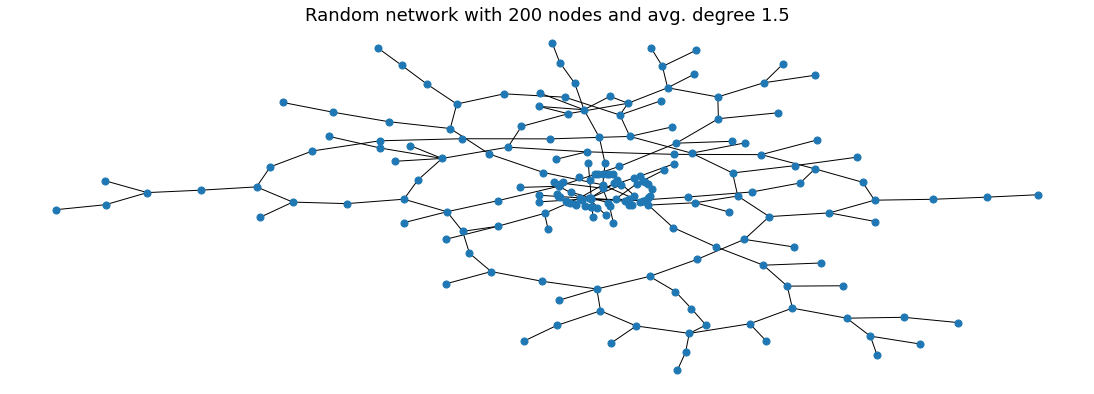

In [25]:
plt.figure(figsize=(15,5))
nx.draw_kamada_kawai(G,node_size=50) 
plt.title("Random network with 200 nodes and avg. degree 1.5",fontsize=18)
plt.show()

* **Extract the Giant Connected Component, GCC.**

Extracting the Giant Connected Component graph (GCC) by selecting the largest connected component:

In [26]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
giant = G.subgraph(Gcc[0])

* **Choose a node at random from the GCC.**

In [27]:
rc=random.choice(list(giant.nodes()))

* **Find all nodes that are precisely 2 steps away from that node.**

In order to find all nodes that are precisely 2 steps away from that node. The following steps are made:

Creating two lists. 

Values: The shortest path from the random node.

Nodess: The nodes belonging to the above values.

In [28]:
values=np.array(list(nx.single_source_shortest_path_length(giant,rc).values()))

In [29]:
nodess=np.array(list(nx.single_source_shortest_path_length(giant,rc).keys())) 

Making a bool-list which detects if the path (or steps) are equal to 2:

In [30]:
steps2= [True if element==2 else False for element in values]

The bool-list can then select the nodes which are 2 steps away:

In [31]:
nodes2=nodess[steps2]

These are 2 steps away:

In [32]:
nodes2 

array([ 64,   1, 193, 108, 176])

* **Plot the GCC**

Plotting the GCC with the following choice of colors. 
Starting node is black.

The nodes 2 steps away are red.

All other nodes are blue.

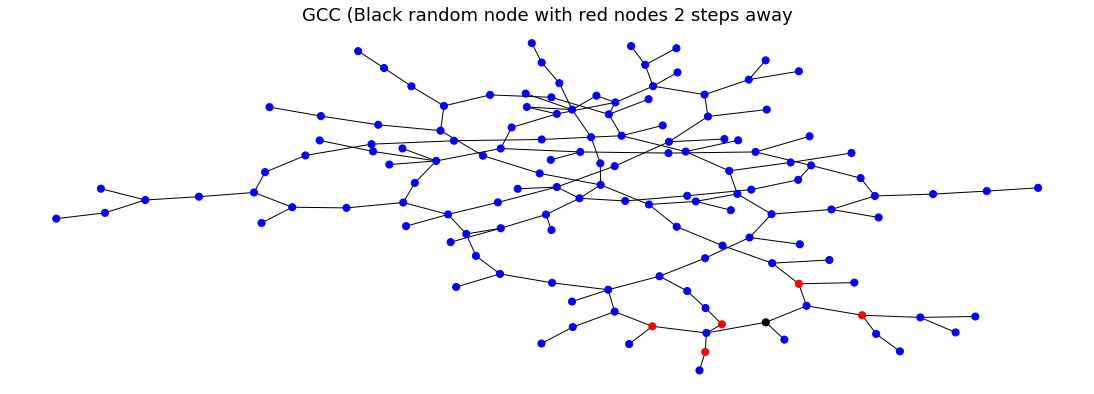

In [33]:
color_map = []
for node in giant:
    if node == rc:
        color_map.append('black')
    elif node in nodes2:
        color_map.append('red') 
    else: 
        color_map.append('blue')  
plt.figure(figsize=(15,5))
nx.draw_kamada_kawai(giant,node_size=50, node_color=color_map)
plt.title("GCC (Black random node with red nodes 2 steps away",fontsize=18)
plt.show()


It can be seen from the graph (GCC), that the red nodes are 2 steps away from the black node.

# Part 3: Watts-Strogatz Networks

## Generating 3 Watts-Strogatz Nerwork graphs

* **Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p = 0, 0.1, and 1. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.**

In order to generate 3 watts strogats graphs, the graph properties (number of nodes, average degree and rewiting probability) are defined:

In [34]:
N=500
avg_deg=4
p=[0,0.1,1]

The graphs are generated.

In [35]:
G1=nx.watts_strogatz_graph(N,avg_deg,p[0])
G2=nx.watts_strogatz_graph(N,avg_deg,p[1])
G3=nx.watts_strogatz_graph(N,avg_deg,p[2])

Calculating the average shortest path for each of the graphs.

In [36]:
nx.average_shortest_path_length(G1)

62.875751503006015

In [37]:
nx.average_shortest_path_length(G2)

7.218933867735471

In [38]:
nx.average_shortest_path_length(G3)

4.779911823647295

When *p=1*, the average shortest path is almost equal to the average degree!

## Understanding the behavior of the WS model as we increase p

* **Let's understand the behavior of the WS model as we increase p in more detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).**

The graph properties (number of nodes, average degree and rewiting probability) are defined.

In [39]:
N=500
avg_deg=4
p=[0,0.01,0.03,0.05,0.1,0.2]

Creating a list of six empty list, each of the six list should hold the values simulated for each of the p's in the following.

In [40]:
listofps=[[],[],[],[],[],[]]

In [41]:
n_sim=50

For each of the p-values, 50 simulations are made. For each simulation the average shortest path length〈d〉 is saved.

In [42]:
for a in range(len(p)): #For all p-values
    for i in range (0,n_sim): #For all 50 simulations
        G=nx.watts_strogatz_graph(N,avg_deg,p[a]) #Generate a WS graph
        listofps[a].append(nx.average_shortest_path_length(G)) #Save the average shortest path length
        

For each p, the average〈d〉and the standard deviation is saved in two lists.

In [43]:
list_of_avg=[]
list_of_std=[]

for i in range(0,6):
    list_of_avg.append(np.mean(listofps[i]))
    list_of_std.append(np.std(listofps[i]))
                       

Plot that shows how the path length decreases very quickly with only a little fraction of re-wiring.

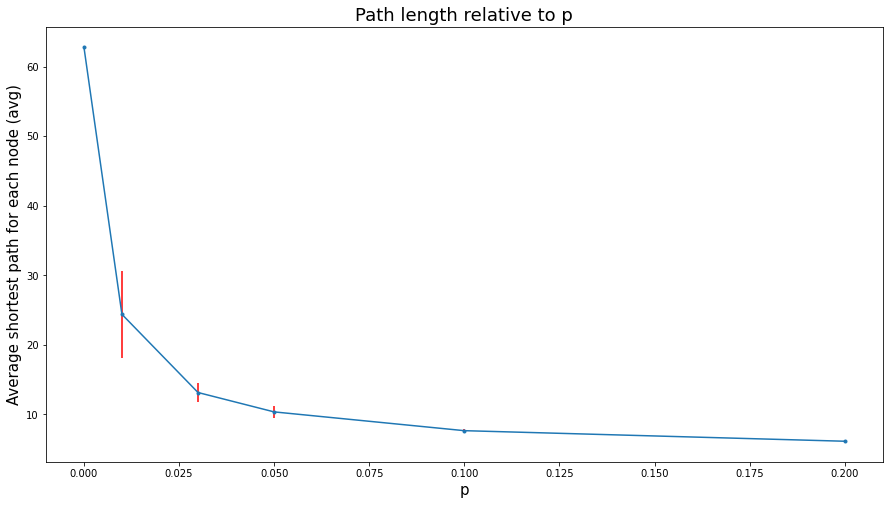

In [44]:
plt.figure(figsize=(15,8))
plt.title('Path length relative to p', fontsize=18)
plt.xlabel('p', fontsize=15)
plt.ylabel('Average shortest path for each node (avg)', fontsize=15)
plt.errorbar(x=p,y=list_of_avg,yerr=list_of_std,fmt='o-',ecolor='red',ms=3)
plt.show()


So when the p value increaes, the average shortest path for each node is decreasing!

# Part 4. The Barabasi-Albert Model



**We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success**

* **Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.**


Creating the graph.

In [45]:
G = nx.Graph()

Adding 100 nodes to the graph. Each node is assigned with preferential attachment, this means that a new node is connecting to one of the existing nodes in proportion to their degree.

In [46]:
for i in range(100):
    G.add_node(i)
    node_list = list(dict(G.degree()).keys()) #Save all the nodes
    value_list = list(dict(G.degree()).values()) # Save their repective degrees

    n = len(value_list)
    prop_list = [element/n for element in value_list] #Saving the proportion for each node

    G.add_edge(random.choices(node_list,prop_list,k=1)[0],i) #add an edge from the new node to an random existing node (with preferential)

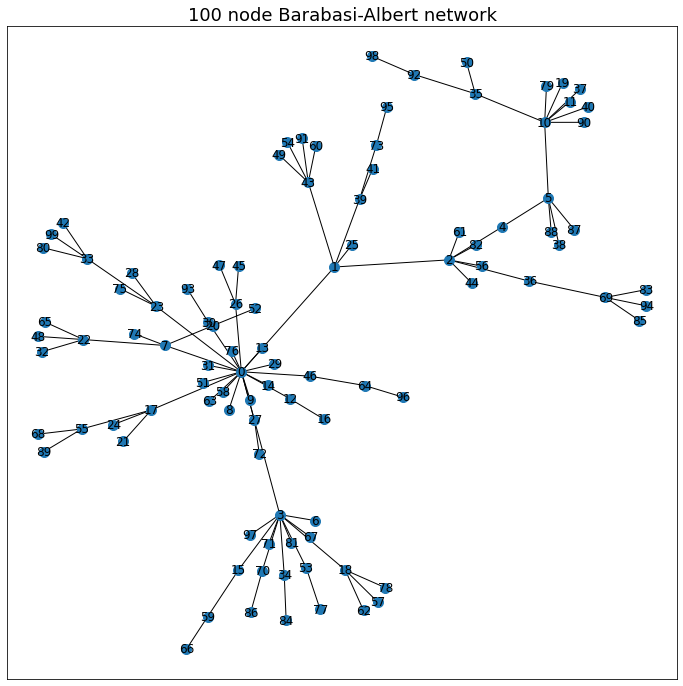

In [47]:
plt.figure(figsize=(12,12))
nx.draw_networkx(G,node_size=100)
plt.title("100 node Barabasi-Albert network",fontsize=18)
plt.show()

* **Now create a 5000 node network.**
  * **What's the maximum and minimum degree?**
  * **Now, bin the degree distribution, for example using `numpy.histogram`.**
  * **Plot the distribution. Plot it with both linear and log-log axes.**

![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ba.png)

Using the same code as before, but now with 5000 nodes.

In [48]:
G2 = nx.Graph()

for i in range(5000):
    G2.add_node(i)
    node_list = list(dict(G2.degree()).keys())
    value_list = list(dict(G2.degree()).values())

    n = len(value_list)
    prop_list = [element/n for element in value_list]

    G2.add_edge(random.choices(node_list,prop_list,k=1)[0],i)

In [49]:
print("Minimum degree is ", np.min(list(dict(G2.degree()).values())))
print("Maximum degree is ", np.max(list(dict(G2.degree()).values())))

Minimum degree is  1
Maximum degree is  208


Plotting the distribution.

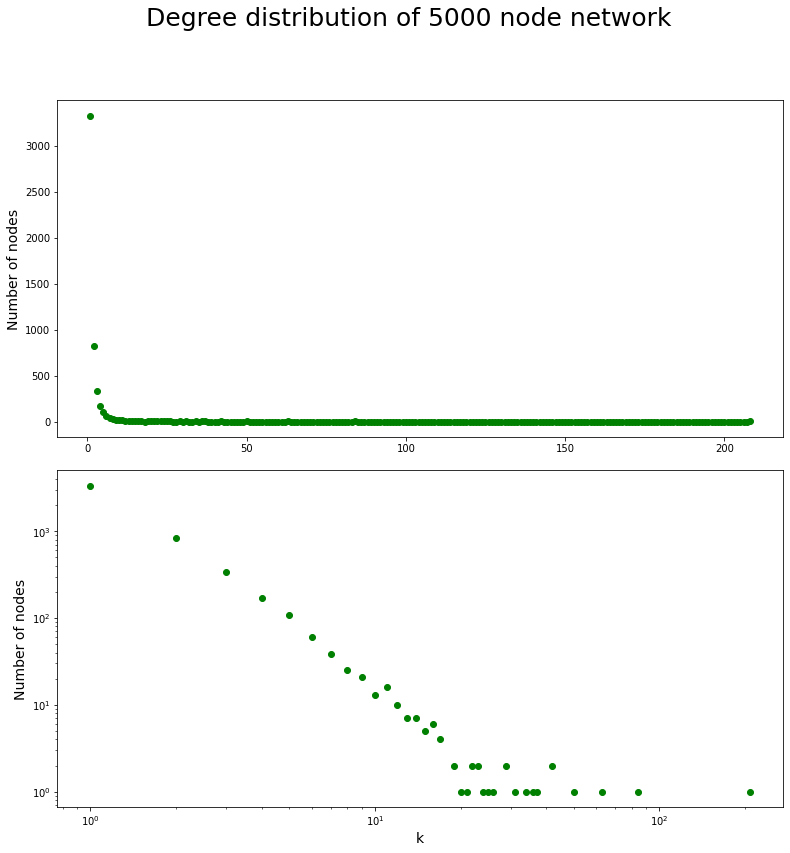

In [50]:
fig, axs = plt.subplots(2,figsize=(13,13))
fig.suptitle('Degree distribution of 5000 node network',size=25)
m=1
degree_freq = nx.degree_histogram(G2)
degrees = range(len(degree_freq))
axs[0].plot(degrees[m:], degree_freq[m:],'go')
axs[1].loglog(degrees[m:], degree_freq[m:],'go')

axs[0].set_ylabel('Number of nodes',fontsize = 14)
axs[1].set_xlabel('k',fontsize = 14)
axs[1].set_ylabel('Number of nodes',fontsize = 14)
plt.subplots_adjust(hspace=0.1)

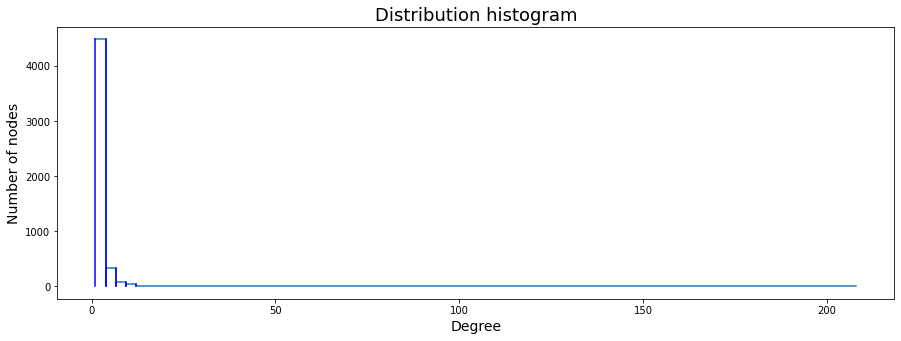

In [51]:
(hist, bin_edges) = np.histogram(list(dict(G2.degree()).values()), bins=75)

rightboundary=bin_edges[1:]
leftboundary=bin_edges[:-1]

newlist=[]
newvalues=[]

for i in range(len(rightboundary)):
        newlist.append(leftboundary[i])
        newvalues.append(hist[i])
        newlist.append(rightboundary[i])
        newvalues.append(hist[i])  

points=zip(newlist,newvalues)

plt.figure(figsize=(15,5))
plt.plot(newlist,newvalues)
for pt in points:
    plt.plot( [pt[0],pt[0]], [0,pt[1]],color="blue" )

plt.title("Distribution histogram",fontsize=18)
plt.xlabel("Degree",fontsize=14)
plt.ylabel("Number of nodes",fontsize=14)
plt.show()

# Part 5 Power-laws and the friendship paradox



**Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:**

* **Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).**
* **Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.**
* **Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.**
* **Do this 1000 times. How many out of those 1000 times is the friendship paradox true?**

In [52]:
test=[]
for i in range(1000):
    rand_node = random.choice(range(len(G2.nodes)))
    rand_node_degree = G2.degree(rand_node)
    rand_node_neighbors = [n for n in G2.neighbors(rand_node)]
    list(dict(G2.degree(rand_node_neighbors)).values())

    n = len(rand_node_neighbors)

    if np.mean(list(dict(G2.degree(rand_node_neighbors)).values())) > rand_node_degree:
        test.append(True)
    else:
        test.append(False)

print("The friendship paradox is true in {} out of 1,000 cases".format(np.sum(test)) )


The friendship paradox is true in 882 out of 1,000 cases


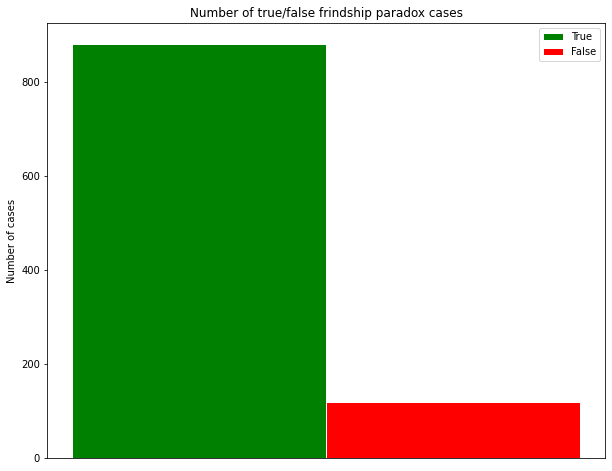

In [53]:
plt.figure(figsize=(10,8))
# Make the plot
plt.bar(1, [np.sum(test)], color='g', width=0.25, edgecolor='white', label='True')
plt.bar(1.25, [1000-np.sum(test)], color='r', width=0.25, edgecolor='white', label='False')
# Create legend & Show graphic
plt.xticks([], [])
plt.legend()
plt.ylabel('Number of cases')
plt.title('Number of true/false frindship paradox cases')
plt.show()

## Building WITHOUT prefering attachment

**Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment.** 

* **Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.**

The average degree (k) is:

In [54]:
k=np.mean(list(dict(G2.degree()).values()))
print(k)

2.0


In [55]:
N=5000

We know that k = p ( N-1)

so p = k/(N-1)



In [56]:
p=k/(N-1)

In [57]:
print("{:.4f}".format(p))

0.0004


Making ER with N=5000 and p=0.0004

In [58]:
G_ER=nx.erdos_renyi_graph(N,p)

In [59]:
list2=list(dict(G_ER.degree()).values()) # This is all of the nodes' degrees

In [61]:
print("The maximum degree of the network without preferential attachment is {}".format(max(list2)))

The maximum degree of the network without preferential attachment is 8


In [63]:
hist,bin_edges=np.histogram(list2,bins=max(list2))

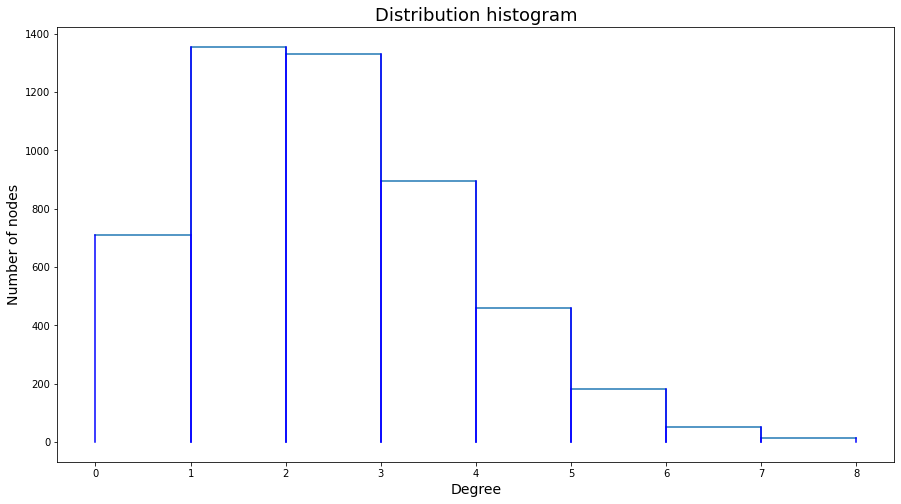

In [64]:
rightboundary=bin_edges[1:]
leftboundary=bin_edges[:-1]
newlist=[] # list with leftboundary1,rightboundary1,leftboundary2,rightboundary2
newvalues=[] # histvalue1,histvalue1,histvalue2,histvalue2,....
for i in range(len(rightboundary)):
        newlist.append(leftboundary[i])
        newvalues.append(hist[i])
        newlist.append(rightboundary[i])
        newvalues.append(hist[i])  
points=zip(newlist,newvalues)

plt.figure(figsize=(15,8))
plt.plot(newlist,newvalues)
for pt in points:
    plt.plot( [pt[0],pt[0]], [0,pt[1]],color="blue" )

plt.title("Distribution histogram",fontsize=18)
plt.xlabel("Degree",fontsize=14)
plt.ylabel("Number of nodes",fontsize=14)
plt.show()

The number of connected components for the network WITH preferential attachment:

In [65]:
nx.number_connected_components(G2)

1

The number of connected components for the network WITHOUT preferential attachment:

In [66]:
nx.number_connected_components(G_ER)

857

**Conclusion:**

WITH PREFERENTIAL ATTACHMENT:

* The highest degree is around 208.

* For the network with pref. attachment there's one (big) connected component!

* The distribution looks like a poission, but has a loooong tail. 


WITHOUT PREFERENTIAL ATTACHMENT:

* The highest degree is 8. 

* In the ER, there a more of components

* The distribution looks like a nice poisson!


This shows, that there are actually a big difference between a random network and a network where we consider real behavior of networks!
